# Importing libraries

In [614]:
import pandas as pd              # data analysis
import numpy as np               # scientific computing
import seaborn as sn             # plotting
import matplotlib.pyplot as plt  # plotting
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler # for random sampling
from sklearn.preprocessing import StandardScaler       # for scaling the data

# Data overview

In [655]:
ds_train = pd.read_csv("../dataset/train.csv")

In [656]:
ds_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


# Exploratory Data Analysis

### Checking for Missing Data

In [657]:
# missing values in each column
ds_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [658]:
# total missing values
ds_train.isnull().sum().sum()

866

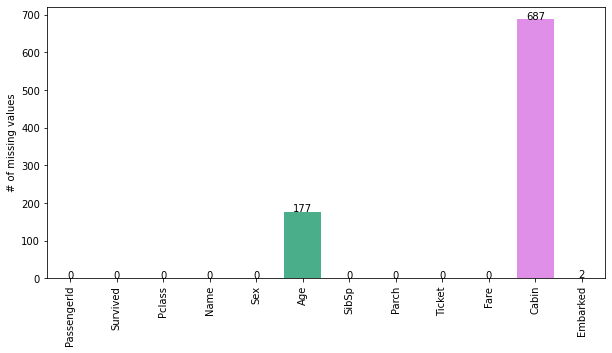

In [659]:
# variables
X = ds_train.columns
Y = ds_train.isnull().sum()

# setting plot size
plt.figure(figsize = (10, 5))

# plotting
sn.barplot(x = X, y = Y)

# adding labels
plt.xticks(rotation = 90)
plt.ylabel("# of missing values")

for i in range(len(X)):
    plt.text(i, Y[i], Y[i], ha = 'center')

plt.show()

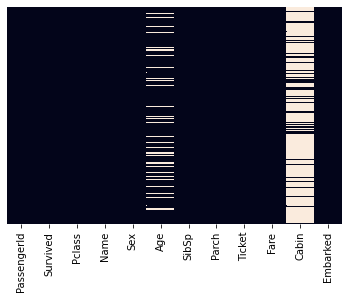

In [660]:
sn.heatmap(ds_train.isnull(), yticklabels = False, cbar = False)
plt.show()

#### Notes on missing data
Age: it is reasonable replace the missing values with some form of imputation.

Cabin: either will be dropped or transformed into a different variable.

Embarked: drop the 2 rows with missing values

### Handling missing data

#### Age

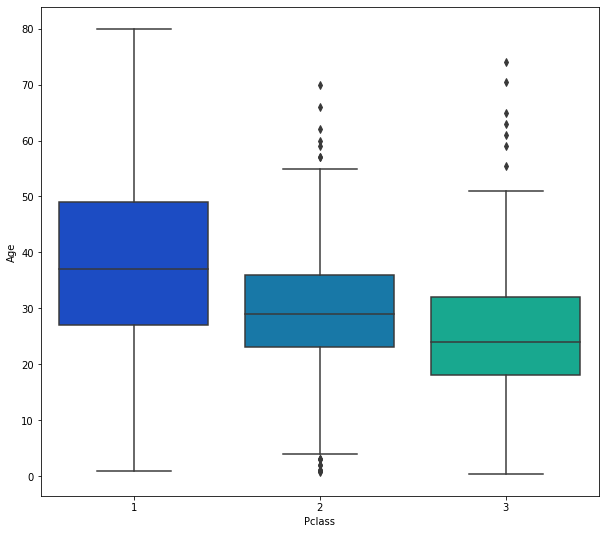

In [661]:
plt.figure(figsize = (10, 9))
sn.boxplot(data = ds_train, x = 'Pclass', y = 'Age', palette = 'winter')
plt.show()

#### Notes on Age
It seems 'Age' is correlated with 'Pclass'. Then, replace 'Age' null values based on 'Pclass'. 

In [662]:
nafill_pclass1 = np.mean(ds_train[ds_train['Pclass'] == 1]['Age'].dropna()).round()
nafill_pclass1

38.0

In [663]:
nafill_pclass2 = np.median(ds_train[ds_train['Pclass'] == 2]['Age'].dropna()).round()
nafill_pclass2

29.0

In [664]:
nafill_pclass3 = np.median(ds_train[ds_train['Pclass'] == 3]['Age'].dropna()).round()
nafill_pclass3

24.0

In [665]:
# replace missing values
def nafill_age(ds):
    age = ds['Age']
    pclass = ds['Pclass']
    
    if pd.isnull(age):
        if pclass == 1:
            return nafill_pclass1
        elif pclass == 2:
            return nafill_pclass2
        else:
            return nafill_pclass3
    else:
        return age

In [666]:
# replace NAs
ds_train['Age'] = ds_train[['Age', 'Pclass']].apply(nafill_age, axis = 1)

In [667]:
ds_train['Age'].isnull().sum()

0

#### Cabin && embarked

In [668]:
# drop 'Cabin' column entirely
ds_train.drop('Cabin', axis = 1, inplace = True)

In [669]:
# drop 'Embarked' NA rows 
ds_train.dropna(inplace = True)

In [670]:
ds_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


In [671]:
ds_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Transforming categorical data

In [672]:
ds_train['Sex'].nunique()

2

In [673]:
ds_train['Embarked'].nunique()

3

In [674]:
sex = pd.get_dummies(ds_train['Sex'], drop_first = True)
sex.head(3)

,male
0,1
1,0
2,0


In [675]:
embarked = pd.get_dummies(ds_train['Embarked'], drop_first = True)
embarked.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [676]:
# rename columns
sex.rename(columns = {"male": "Sex_male"}, inplace = True)
embarked.rename(columns = {"Q": "Embarked_Q", 
                           "S": "Embarked_S"}, inplace = True)

In [677]:
ds_train = pd.concat([ds_train, sex, embarked], axis = 1)

In [678]:
ds_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1


### Removing unneccessary columns

In [679]:
ds_train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [680]:
ds_train.head(7)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1


### Checking if the dataset is balanced or unbalanced

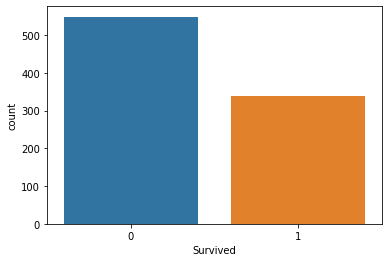

In [681]:
sn.countplot(data = ds_train, x = 'Survived')
plt.show()

It seems our dataset is not balanced, undersampling should work.

### Undersampling

In [682]:
Y = ds_train['Survived']
X = ds_train.drop('Survived', axis = 1)

In [683]:
rus = RandomUnderSampler(random_state = 0)

In [684]:
X_resampled, Y_resampled = rus.fit_resample(X, Y)

In [685]:
len(X_resampled) == len(Y_resampled)

True

In [686]:
ds_train_balanced = pd.concat([X_resampled, Y_resampled], axis = 1)

In [687]:
ds_train_balanced.head(7)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,2,25.0,0,0,13.0000,1,0,1,0
1,3,33.0,0,0,7.7750,1,0,1,0
2,2,42.0,0,0,13.0000,1,0,1,0
3,3,24.0,0,0,7.7500,0,1,0,0
4,3,45.5,0,0,7.2250,1,0,0,0
5,3,19.0,0,0,8.1583,1,0,1,0
6,3,21.0,0,0,8.6625,1,0,1,0


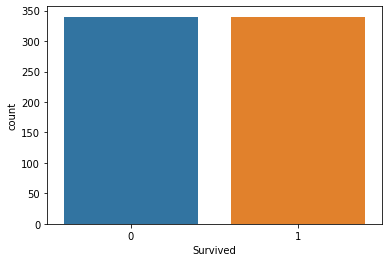

In [688]:
sn.countplot(data = ds_train_balanced, x = 'Survived')
plt.show()

The data set is balanced!

In [689]:
# Saving the data set:

# There will be 2 data sets; I would like to test them and take a look at the results: 
# 1. 'final_train.csv'               => balanced 
# 2. 'final_train_std.csv'           => balanced, standardized

In [690]:
ds_train_balanced_std = ds_train_balanced
ds_train_balanced.to_csv('../dataset/final_train.csv')

### Performing standartization upon Age and Fare (to scale it down)

In [692]:
scaler = StandardScaler()

In [693]:
ds_train_balanced_std[['Age', 'Fare']] = scaler.fit_transform(ds_train_balanced_std[['Age', 'Fare']])

In [694]:
ds_train_balanced_std.head(7)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,2,-0.268287,0,0,-0.409478,1,0,1,0
1,3,0.338144,0,0,-0.506807,1,0,1,0
2,2,1.020379,0,0,-0.409478,1,0,1,0
3,3,-0.344091,0,0,-0.507273,0,1,0,0
4,3,1.285693,0,0,-0.517052,1,0,0,0
5,3,-0.723110,0,0,-0.499667,1,0,1,0
6,3,-0.571502,0,0,-0.490275,1,0,1,0


In [695]:
ds_train_balanced_std.to_csv('../dataset/final_train_std.csv')